In [1]:
papdir    = '..'
pydir     = '{0}/python'.format(papdir)
outdir    = '{0}/out'.format(papdir)

datdir_pf = '{0}/pf_m1_perturb'.format(outdir)
datdir_sn = '{0}/sn_m2_perturb'.format(outdir)

figdir    = '{0}/figs'.format(papdir)

In [3]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import mixture

import os
import sys
sys.path.append(pydir)
import myfun as mf
import copy

import matplotlib as mpl
#mpl.use('Agg')

from matplotlib import rc, gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches

rc('font', **{'family':'serif','serif':['Palatino']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{amssymb}') 

In [4]:
# run the pitchfork perturbation simulations
# takes several hours
sc_fixed = 200
m1_var = np.arange(0.9,1.1,0.01)

for m1 in m1_var:
    cmd = 'python {0}/grn_sim_runner.py --run_pf --dir {1}/m1{2:.2f} --m1 {2} --scale {3} --tau_range 1 3 0.1'.format(
        pydir, datdir_pf, m1, sc_fixed)
    !{cmd}

tau = 1.00; m1 = 0.90; noise scale = 200.00
tau = 1.10; m1 = 0.90; noise scale = 200.00
tau = 1.20; m1 = 0.90; noise scale = 200.00
tau = 1.30; m1 = 0.90; noise scale = 200.00
tau = 1.40; m1 = 0.90; noise scale = 200.00
tau = 1.50; m1 = 0.90; noise scale = 200.00
tau = 1.60; m1 = 0.90; noise scale = 200.00
tau = 1.70; m1 = 0.90; noise scale = 200.00
tau = 1.80; m1 = 0.90; noise scale = 200.00
tau = 1.90; m1 = 0.90; noise scale = 200.00
tau = 2.00; m1 = 0.90; noise scale = 200.00
tau = 2.10; m1 = 0.90; noise scale = 200.00
tau = 2.20; m1 = 0.90; noise scale = 200.00
tau = 2.30; m1 = 0.90; noise scale = 200.00
tau = 2.40; m1 = 0.90; noise scale = 200.00
tau = 2.50; m1 = 0.90; noise scale = 200.00
tau = 2.60; m1 = 0.90; noise scale = 200.00
tau = 2.70; m1 = 0.90; noise scale = 200.00
tau = 2.80; m1 = 0.90; noise scale = 200.00
tau = 2.90; m1 = 0.90; noise scale = 200.00
tau = 1.00; m1 = 0.91; noise scale = 200.00
tau = 1.10; m1 = 0.91; noise scale = 200.00
tau = 1.20; m1 = 0.91; noise sca

In [5]:
# run the saddle node perturbation simulations simulations
# takes several hours
sc_fixed = 20
m2_var   = np.arange(2.8,3.2,0.02)
for m2 in m2_var:
    cmd = 'python {0}/grn_sim_runner.py --dir {1}/m2{2:.2f} --m2 {2} --scale {3}'.format(
        pydir, datdir_sn, m2, sc_fixed)
    !{cmd}

tau = 1.00; m1 = 2.00; noise scale = 20.00
tau = 1.00; m1 = 2.10; noise scale = 20.00
tau = 1.00; m1 = 2.20; noise scale = 20.00
tau = 1.00; m1 = 2.30; noise scale = 20.00
tau = 1.00; m1 = 2.40; noise scale = 20.00
tau = 1.00; m1 = 2.50; noise scale = 20.00
tau = 1.00; m1 = 2.60; noise scale = 20.00
tau = 1.00; m1 = 2.70; noise scale = 20.00
tau = 1.00; m1 = 2.80; noise scale = 20.00
tau = 1.00; m1 = 2.90; noise scale = 20.00
tau = 1.00; m1 = 3.00; noise scale = 20.00
tau = 1.00; m1 = 3.10; noise scale = 20.00
tau = 1.00; m1 = 3.20; noise scale = 20.00
tau = 1.00; m1 = 3.30; noise scale = 20.00
tau = 1.00; m1 = 3.40; noise scale = 20.00
tau = 1.00; m1 = 3.50; noise scale = 20.00
tau = 1.00; m1 = 3.60; noise scale = 20.00
tau = 1.00; m1 = 3.70; noise scale = 20.00
tau = 1.00; m1 = 3.80; noise scale = 20.00
tau = 1.00; m1 = 3.90; noise scale = 20.00
tau = 1.00; m1 = 4.00; noise scale = 20.00
tau = 1.00; m1 = 2.00; noise scale = 20.00
tau = 1.00; m1 = 2.10; noise scale = 20.00
tau = 1.00;

In [7]:
# analysis of pitchfork perturb
pf_m1_datdirs    = ['{0}/m1{1:.2f}'.format(datdir_pf, m1) for m1 in m1_var]

pf_m1_tau       = np.array([np.load('{0}/taus.npy'.format(datdir)) for datdir in pf_m1_datdirs])
pf_m1_gexp      = np.array([np.load('{0}/gexp.npy'.format(datdir)) for datdir in pf_m1_datdirs])

nm1, nt, nc, ng = pf_m1_gexp.shape
nsamp           = 100

pf_m1_gexp_eig1      = np.zeros((nm1, nt))
pf_m1_gexp_shuf_eig1 = np.zeros((nm1, nt, nsamp))

pf_m1_gexp_evar1      = np.zeros((nm1, nt))
pf_m1_gexp_shuf_evar1 = np.zeros((nm1, nt, nsamp))

pca = PCA(n_components = 2)
for i in range(nm1):
    for t in range(nt):
        pca.fit(pf_m1_gexp[i,t])
        pf_m1_gexp_eig1[i,t]  = pca.explained_variance_[0]
        pf_m1_gexp_evar1[i,t] = pca.explained_variance_ratio_[0]
        for j in range(nsamp):
            gexp_shuf = np.array([pf_m1_gexp[i,t,:,g][np.random.choice(nc, nc, replace=True)] for g in range(ng)]).T
            pca.fit(gexp_shuf)
            pf_m1_gexp_shuf_eig1[i,t,j]=pca.explained_variance_[0]
            pf_m1_gexp_shuf_evar1[i,t,j]=pca.explained_variance_ratio_[0]

In [8]:
pf_m1_gexp_shuf_eig1_mu  = np.mean(pf_m1_gexp_shuf_eig1,axis=2)
pf_m1_gexp_shuf_eig1_std = np.std(pf_m1_gexp_shuf_eig1,axis=2)

pf_m1_gexp_shuf_evar1_mu  = np.mean(pf_m1_gexp_shuf_evar1,axis=2)
pf_m1_gexp_shuf_evar1_std = np.std(pf_m1_gexp_shuf_evar1,axis=2)

tau_bif_val = 2
pf_m1_bif_idx = np.argmin(np.abs(pf_m1_tau[0]-tau_bif_val))

m1_bif_val = 1
pf_m1_m1_bif_idx = np.argmin(np.abs(m1_var-m1_bif_val))

In [9]:
# analysis of saddle node perturb
sn_m2_datdirs    = ['{0}/m2{1:.2f}'.format(datdir_sn, m2) for m2 in m2_var]

sn_m2_m1        = np.array([np.load('{0}/m1s.npy'.format(datdir)) for datdir in sn_m2_datdirs])
sn_m2_gexp      = np.array([np.load('{0}/gexp.npy'.format(datdir)) for datdir in sn_m2_datdirs])

nm2, nt, nc, ng = sn_m2_gexp.shape
nsamp           = 100

sn_m2_gexp_eig1      = np.zeros((nm2, nt))
sn_m2_gexp_evar1     = np.zeros((nm2, nt))

sn_m2_gexp_shuf_eig1  = np.zeros((nm2, nt, nsamp))
sn_m2_gexp_shuf_evar1 = np.zeros((nm2, nt, nsamp))


pca = PCA(n_components = 2)
for i in range(nm2):
    for t in range(nt):
        pca.fit(sn_m2_gexp[i,t])
        sn_m2_gexp_eig1[i,t]  = pca.explained_variance_[0]
        sn_m2_gexp_evar1[i,t] = pca.explained_variance_ratio_[0]

        for j in range(nsamp):
            gexp_shuf = np.array([sn_m2_gexp[i,t,:,g][np.random.choice(nc, nc, replace=True)] for g in range(ng)]).T
            pca.fit(gexp_shuf)
            sn_m2_gexp_shuf_eig1[i,t,j] =pca.explained_variance_[0]
            sn_m2_gexp_shuf_evar1[i,t,j]=pca.explained_variance_ratio_[0]

In [10]:
sn_m2_gexp_shuf_eig1_mu  = np.mean(sn_m2_gexp_shuf_eig1,axis=2)
sn_m2_gexp_shuf_eig1_std = np.std(sn_m2_gexp_shuf_eig1,axis=2)

sn_m2_gexp_shuf_evar1_mu  = np.mean(sn_m2_gexp_shuf_evar1,axis=2)
sn_m2_gexp_shuf_evar1_std = np.std(sn_m2_gexp_shuf_evar1,axis=2)

m1_bif_val = 3
m2_bif_val = 3
sn_m2_bif_idx = np.argmin(np.abs(sn_m2_m1[0]-m1_bif_val))
sn_m2_m2_bif_idx = np.argmin(np.abs(m2_var-m2_bif_val))

In [13]:
pf_m1_bif_val = 1
sn_m2_bif_val = 3
ncell = pf_m1_gexp.shape[2]

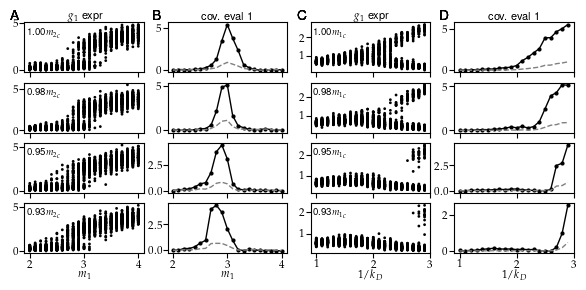

In [14]:
# plot both
wid = 18/2.54
nrow = 4
ncol = 4
plt.style.use('{0}/sty/one_col_fig.mplstyle'.format(papdir))
fig,axs=plt.subplots(nrow,ncol,figsize=(wid,3), dpi=100)

pf_idx_diffs = np.array([0,-2,-5,-7])
sn_idx_diffs = np.array([0,-3,-7,-10])

pf_idxs = pf_m1_m1_bif_idx + pf_idx_diffs
sn_idxs = sn_m2_m2_bif_idx + sn_idx_diffs

#cols = plt.cm.viridis(np.linspace(0,1,len(pf_idxs)))
titles = ['cov. eval 1', r'$g_1$ expr']
caps = ['A','B','C','D']
pf_m1_frac = m1_var[pf_idxs]/pf_m1_bif_val
sn_m2_frac = m2_var[sn_idxs]/sn_m2_bif_val

for i, pfi in enumerate(pf_idxs):
    
    sni = sn_idxs[i]
    
    axs[i,1].plot(sn_m2_m1[sni],sn_m2_gexp_eig1[sni]-sn_m2_gexp_eig1[sni,0],'-', color='k', marker='o')
    axs[i,1].plot(sn_m2_m1[sni],sn_m2_gexp_shuf_eig1_mu[sni] - sn_m2_gexp_shuf_eig1_mu[sni,0],'--',color = 'gray')
    
    tau_min=0
    tau_max=4
    idxs = np.where((pf_m1_tau[pfi]>=tau_min) & (pf_m1_tau[pfi]<=tau_max))[0]
    axs[i,3].plot(pf_m1_tau[pfi, idxs], pf_m1_gexp_eig1[pfi,idxs]         - np.amin(pf_m1_gexp_eig1[pfi,idxs]),'-', color='k', marker='o')
    axs[i,3].plot(pf_m1_tau[pfi, idxs], pf_m1_gexp_shuf_eig1_mu[pfi,idxs] - np.amin(pf_m1_gexp_shuf_eig1_mu[pfi,idxs]),'--',color = 'gray')
    
    for j in range(sn_m2_m1[sni].shape[0]):
        axs[i,0].scatter(sn_m2_m1[sni,j]*np.ones(ncell),sn_m2_gexp[sni,j,:,0],marker='o',facecolor='none',edgecolor='k', s=1)

    for j in range(pf_m1_tau[pfi].shape[0]):
        axs[i,2].scatter(pf_m1_tau[pfi,j]*np.ones(ncell),pf_m1_gexp[pfi,j,:,0],marker='o',facecolor='none',edgecolor='k', s=1)
    
    axs[i,0].text(s=r'{0:.2f}$m_{{2_c}}$'.format(sn_m2_frac[i]),x=0.02,y=0.75, transform=axs[i,0].transAxes, fontsize=7)
    axs[i,2].text(s=r'{0:.2f}$m_{{1_c}}$'.format(pf_m1_frac[i]),x=0.02,y=0.75, transform=axs[i,2].transAxes, fontsize=7)

    for j in range(ncol):
        axs[0,j].text(s=caps[j],x=-0.12,y=1.05,transform=axs[0,j].transAxes)
        ax = axs[i,j]
        if j>1:
            ax.set_xticks([1,2,3])
        if i < nrow - 1:
            ax.set_xticklabels([])
        else:
            if j<2:
                ax.set_xlabel(r'$m_1$')
            else:
                ax.set_xlabel(r'$1/k_D$')
        if i==0:
            if j%2==0:
                ax.set_title(titles[1])
            else:
                ax.set_title(titles[0])
                
            
            
plt.subplots_adjust(wspace=0.2)
plt.savefig('{0}/fig_s8_small_errors.pdf'.format(figdir), bbox_inches='tight')
